In [2]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [11]:
df = pd.read_csv("salaries.csv")
# To display the top 5 rows 
df.head(5)   

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Analyst,82000,USD,82000,US,0,US,M
1,2023,SE,FT,Data Analyst,77000,USD,77000,US,0,US,M
2,2023,SE,FT,Data Engineer,196000,USD,196000,US,100,US,M
3,2023,SE,FT,Data Engineer,94000,USD,94000,US,100,US,M
4,2023,SE,FT,Data Scientist,264846,USD,264846,US,0,US,M


In [5]:
df.tail(5)                        # To display the botton 5 rows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
9497,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
9498,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
9499,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
9500,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
9501,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [6]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [7]:
df.shape

(9502, 11)

## 2. Check Duplicates

Do not drop duplicate since it is possible it is all the same \
Question: but 4043/9502 are dupliated? Too many?

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (4043, 11)


In [9]:
df.count()      # Used to count the number of rows

work_year             9502
experience_level      9502
employment_type       9502
job_title             9502
salary                9502
salary_currency       9502
salary_in_usd         9502
employee_residence    9502
remote_ratio          9502
company_location      9502
company_size          9502
dtype: int64

## 3. Check missing or null values

In [12]:
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


## 4. Check Outliers
drop or not?

<Axes: xlabel='salary_in_usd'>

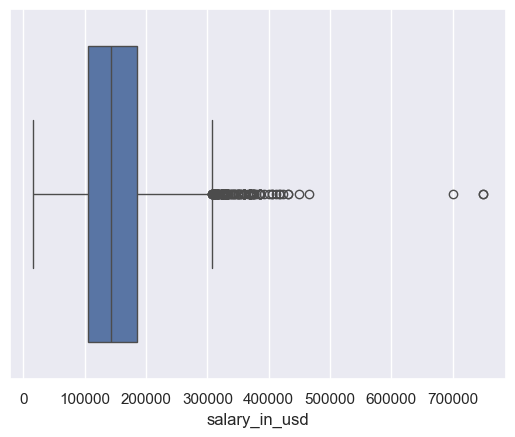

In [15]:
sns.boxplot(x=df['salary_in_usd'])

## 5. Relationships
->1. heatmap for the relationships 
 
->2. salary by everything....

### *1. job title & salary

Job title influence salary \
Many titles do not have enough entries

In [62]:
result_title = df.groupby('job_title').salary_in_usd.agg([len, min, max, np.std, np.mean])

In [48]:
result_title['entry_count'] = result_title['len']
result_title_sorted = result_title.sort_values(by='entry_count', ascending=False)
print(result_title_sorted)

                                  len     min     max           std  \
job_title                                                             
Data Engineer                    2216   17025  750000  58909.447982   
Data Scientist                   2021   16000  750000  62253.150726   
Data Analyst                     1416   15000  430967  43207.469495   
Machine Learning Engineer        1002   20000  392000  62086.410521   
Applied Scientist                 272   20000  350000  50196.310246   
...                               ...     ...     ...           ...   
Marketing Data Engineer             1   66970   66970           NaN   
Managing Director Data Science      1  300000  300000           NaN   
Manager Data Management             1  125000  125000           NaN   
Consultant Data Engineer            1  118539  118539           NaN   
Staff Machine Learning Engineer     1  185000  185000           NaN   

                                          mean  entry_count  
job_title     

### *2. Employee residence & salary
Employee residence influce salary \
Not enough entries for many employee residence locations 

In [61]:
result_eeresi = df.groupby('employee_residence').salary_in_usd.agg([len, min, max, np.std, np.mean])

In [51]:
result_eeresi['entry_count'] = result_eeresi['len']
result_eeresi_sorted = result_eeresi.sort_values(by='entry_count', ascending=False)
print(result_eeresi_sorted)

                     len     min     max           std           mean  \
employee_residence                                                      
US                  8149   24000  750000  60390.986792  158791.579948   
GB                   452   30000  430967  61317.867419  103919.287611   
CA                   226   40747  306400  60094.663839  144966.526549   
ES                   119   21593  253750  36635.146485   57997.865546   
DE                    66   15966  275000  53943.000307   97640.636364   
...                  ...     ...     ...           ...            ...   
KW                     1   50000   50000           NaN   50000.000000   
LU                     1   59102   59102           NaN   59102.000000   
MT                     1   28369   28369           NaN   28369.000000   
MU                     1  100000  100000           NaN  100000.000000   
IQ                     1  100000  100000           NaN  100000.000000   

                    entry_count  
employee_residen

### *3. Remote ratio & salary

In [60]:
result_remote = df.groupby('remote_ratio').salary_in_usd.agg([len, min, max, np.std, np.mean])

In [53]:
result_remote['entry_count'] = result_remote['len']
result_remote_sorted = result_remote.sort_values(by='entry_count', ascending=False)
print(result_remote_sorted)

               len    min     max           std           mean  entry_count
remote_ratio                                                               
0             5811  15000  750000  65246.376941  155445.123731         5811
100           3469  15000  700000  61084.186227  144199.231767         3469
50             222  15680  423000  60852.045359   82437.414414          222


### *4. Company location & salary

In [59]:
result_comloc = df.groupby('company_location').salary_in_usd.agg([len, min, max, np.std, np.mean])

In [55]:
result_comloc['entry_count'] = result_comloc['len']
result_comloc_sorted = result_comloc.sort_values(by='entry_count', ascending=False)
print(result_comloc_sorted)

                   len     min     max           std           mean  \
company_location                                                      
US                8198   20000  750000  60670.044756  158323.258600   
GB                 459   30000  430967  61008.705859  103471.790850   
CA                 228   15000  306400  61328.507779  144147.618421   
ES                 115   21593  253750  34116.688406   55876.165217   
DE                  73   15966  275000  54135.947146   90519.068493   
...                ...     ...     ...           ...            ...   
HN                   1   20000   20000           NaN   20000.000000   
MU                   1  100000  100000           NaN  100000.000000   
MT                   1   28369   28369           NaN   28369.000000   
MD                   1   18000   18000           NaN   18000.000000   
AD                   1   50745   50745           NaN   50745.000000   

                  entry_count  
company_location               
US          

### *5. Company size & mean salary

In [32]:
df.groupby('company_size').salary_in_usd.agg([len, min, max, np.std, np.mean])

,len,min,max,std,mean
company_size,,,,,
L,792,15000,423000,75116.179244,135827.113636
M,8540,15000,750000,62993.009444,152142.612763
S,170,15809,416000,59293.627461,87922.752941


### *6. Heat maps

<Axes: >

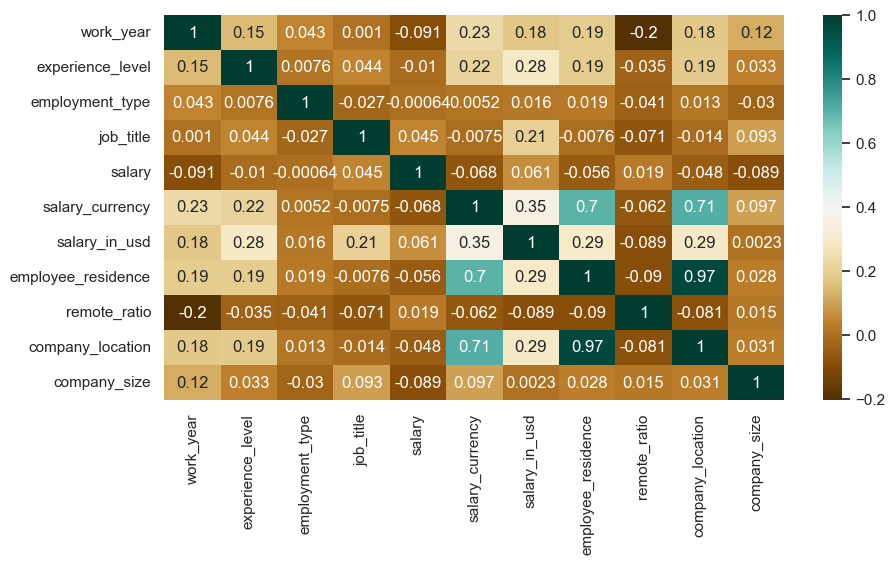

In [67]:
df['experience_level']=df['experience_level'].astype('category').cat.codes
df['employment_type']=df['employment_type'].astype('category').cat.codes
df['job_title']=df['job_title'].astype('category').cat.codes
df['salary_currency']=df['salary_currency'].astype('category').cat.codes
df['employee_residence']=df['employee_residence'].astype('category').cat.codes
df['company_location']=df['company_location'].astype('category').cat.codes
df['company_size']=df['company_size'].astype('category').cat.codes

plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)


drop less than 5 entries for features:\
company_location, \
employee_residence, \
job_title 

In [63]:
df5p = df.groupby(['job_title', 'employee_residence', 'company_location']).salary_in_usd.agg([len, min, max, np.std, np.mean])

# Filter out entries based on the specified conditions
df5p = df5p[(df5p['len'] > 4)]


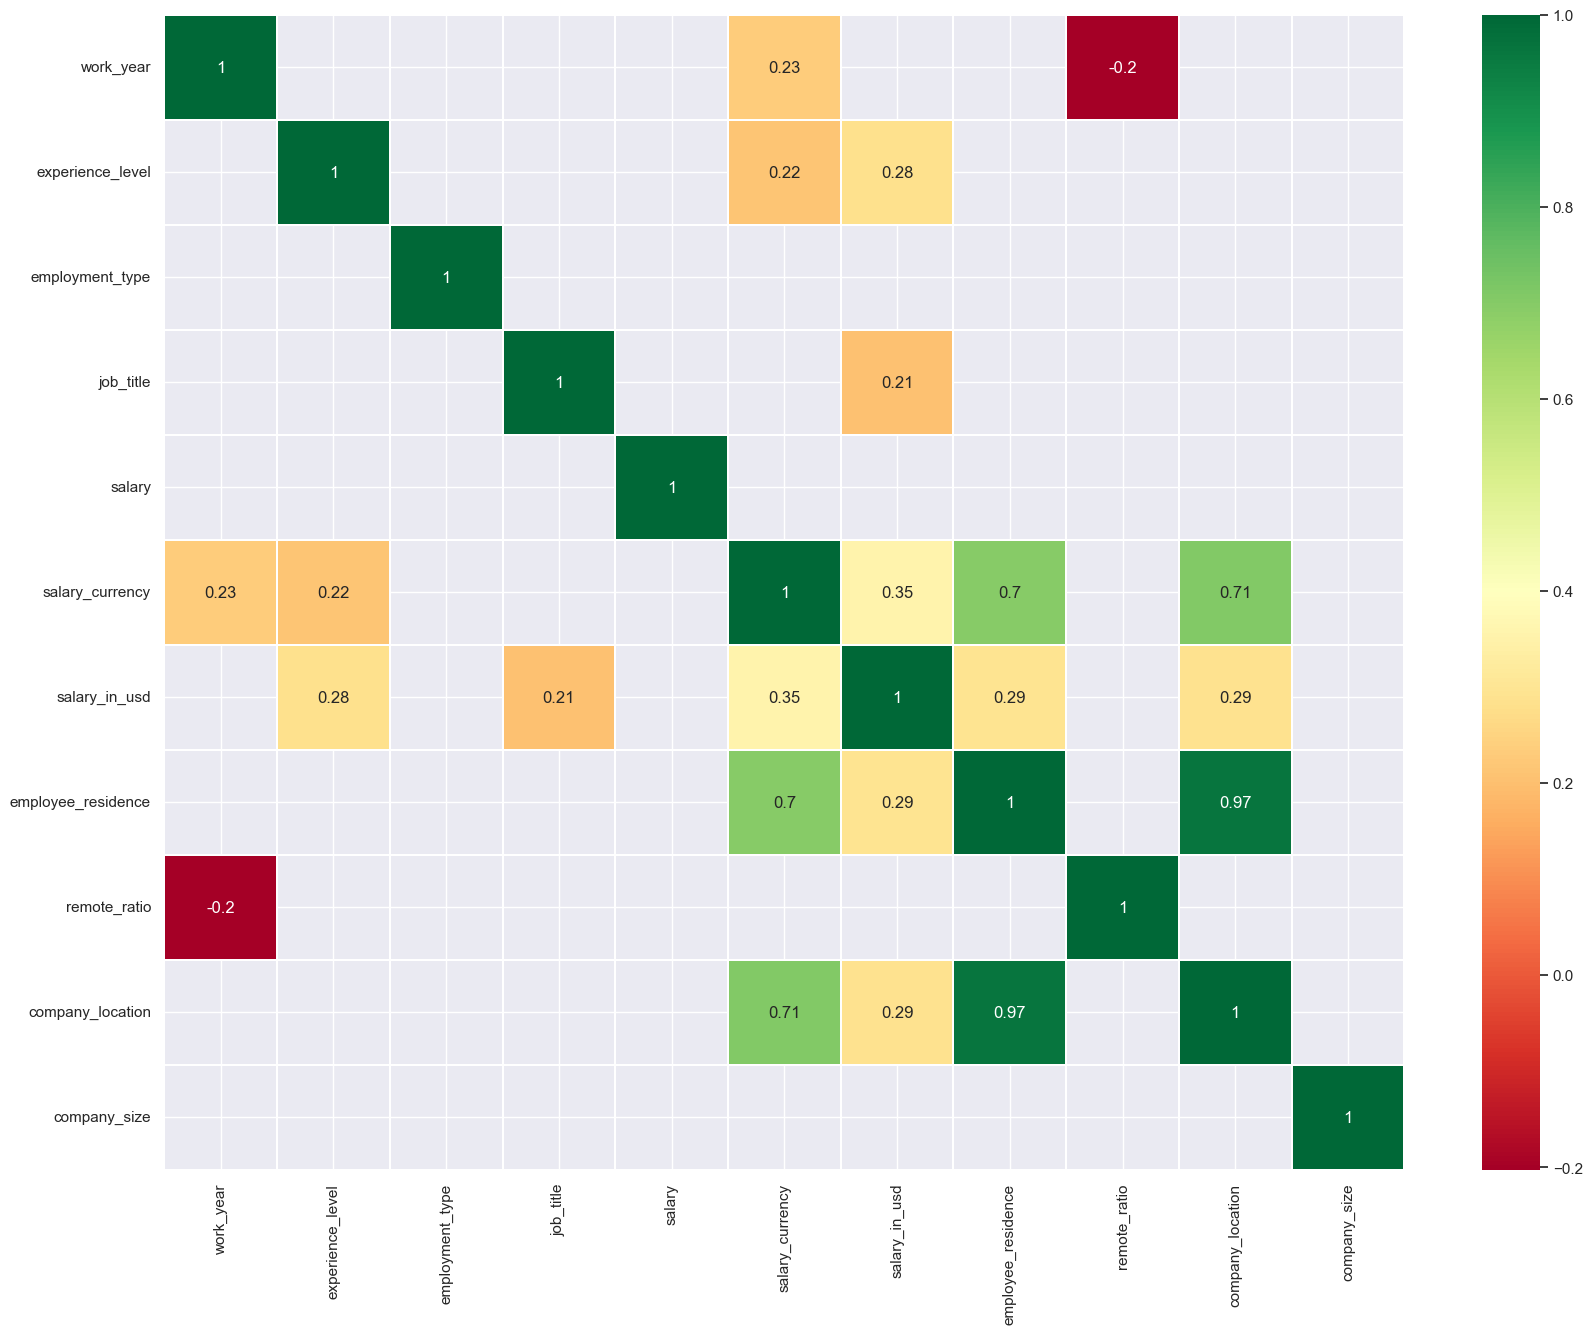

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = df.corr()

# Replace values smaller than 0.5 in absolute value with np.nan
corr_matrix[corr_matrix.abs() < 0.2] = np.nan

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)

# Get the current figure
fig = plt.gcf()

# Set figure size
fig.set_size_inches(20, 15)

# Show the plot
plt.show()

In [1]:
!pip install -U scikit-learn

In [2]:
import sklearn